第十二章 图像轮廓

边缘检测能够检测出边缘，但是边缘是不连续的，图像轮廓是指将边缘连接起来形成的一个整体。

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

def show(img):
    #picture_name_full = picture_name + ".jpg"
    #img = cv2.imread(picture_name_full)
    img = img[:,:,(2,1,0)]                # opencv中的通道顺序是BGR，与Python的RGB刚好相反。因此此处需要调整顺序。
    img2 = img[:,:,::-1]                  # 必须为 ::-1
    plt.imshow(img)
    #plt.imshow(q,cmap = plt.cm.gray),plt.axis('off'),用于正确显示灰度图
    #plt.figure(figsize=(10,10)),用于放大，这样子是放大十倍，但只是放大显示，不是放大图像本身

#查找图像轮廓：cv2.findContours()
#image,contours,hierarchy = cv2.findContours(image,mode,method)
#式中的返回值：
#image:与输入的image一致，后续版本中这个返回值会被省略
#contours:返回的轮廓
#hierarchy:图像的拓扑信息（轮廓层次）

#式中的参数：
#image:8位单通道图像，会自动被转换为二值图像，非0为1,0为0。实际操作中，可以先将图像进行阈值处理，将图像转换成二值图像。
#mode"轮廓检索模式
#method:轮廓的近似方法

In [8]:
#进一步解释contours：
#contours是一组轮廓信息，每个轮廓都是由若干个点构成，因而contours可以理解为一个二维数组（矩阵），但它的属性依旧是list
#数组的索引从0开始，contours[i]表示第i个轮廓，contours[i][j]表示第i个轮廓的第j个点

#contours具有以下几种属性：
#type属性：contours的type属性是list，list的每一个元素都是图像的一个轮廓，用Numpy中的ndarray结构表示。

#由于较为复杂， 因而用程序演示一遍，如果还是不能理解，就多看看书P230-231
o = cv2.imread('contours.bmp')
#show(o)
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY) #轮廓检测需要输入8位单通道图像,下面还会进行阈值预处理，转换为二值图像
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY) #ret就是127，返回阈值
contours,hierarchy = cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)#需要省略image，因为opencv更新到4了，哈哈
print(type(contours))
print(type(contours[0]))
print(len(contours))
print(len(contours[0]))
print(contours[0].shape) #需要注意下shape,与预想的不太一样
print(contours[0])

<class 'list'>
<class 'numpy.ndarray'>
3
4
(4, 1, 2)
[[[ 79 270]]

 [[ 79 383]]

 [[195 383]]

 [[195 270]]]


In [9]:
#返回值hierarchy
#图像的轮廓之间可能有关系，比如一个在另一个内部，此时外部的称为父轮廓，内部的称为子轮廓。
#根据轮廓之间的关系，可以确定轮廓之间的连接方式，hierarchy就是轮廓的层次关系信息。
#对于每个轮廓contours[i]，对应 4 个元素来说明当前轮廓的层次关系，分别是[Next, Previous, First_Child, Parent]
#Next : 后一个轮廓的索引编号；Previous: 前一个轮廓的索引编号
#First_Child : 第一个子轮廓的索引编号； Parent : 父轮廓的索引编号（估计只有一个）
#为空时,值为-1
print(hierarchy) #承接上一段代码

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]


#参数mode
#参数mode决定了轮廓的提取方式，具体有如下 4 种：
#cv2.RETR_EXTERNAL : 只检测外轮廓,考虑实际情况这个可能比较常用
#cv2.RETR_LIST : 对检测到的轮廓不建立等级关系
#cv2.RETR_CCOMP: 检测所有轮廓并将他们组织成两级层次结构。上面的一层为外边界， 下面的一层为内孔的边界，如果内孔内还有一个连通物体
# 那么这个物体的边界仍然位于上层。
#cv2.RETR_TREE : 建立一个等级树结构的轮廓

#参数method
#参数method决定了如果表达轮廓
#cv2.CHAIN_APPROX_NONE : 存储所有的轮廓点，相邻两个点的像素位置差不超过1
#cv2.CHAIN_APPROX_SIMPE： 压缩水平方向，垂直方向，对角线方向的元素。极端情况下，一个矩形只需要四个顶点来表示。

#绘制图像轮廓：darwContours函数
#image = cv2.drawContours(image,contours,contourIdx,color[,thickness[,lineType[,hierarchy[,maxLevel[,offset]]]]])
#contourIdx : 需要绘制的轮廓索引，如果全要就是-1
#color : 用BGR格式表示
#maxLevel : 控制所绘制的轮廓层次的深度。如果是0，则只绘制第0层轮廓，如果是其他的正数，则绘制该正数层及以下的轮廓
#offset : 编译参数，使轮廓偏移到别的位置显示

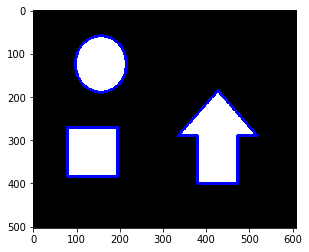

In [13]:
#轮廓实例
o = cv2.imread('contours.bmp')
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
o = cv2.drawContours(o,contours,-1,(255,0,0),5)
show(o)

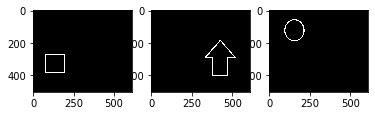

In [15]:
#通过contourIdx逐个显示图像轮廓
o = cv2.imread('contours.bmp')
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

n = len(contours)
contoursImg = []
for i in range(n):
    temp = np.zeros(o.shape,np.uint8)
    contoursImg.append(temp)
    contoursImg[i] = cv2.drawContours(contoursImg[i],contours,i,(255,255,255),5) #最后一个i就是contourIdx
    plt.subplot(1,len(contours),i+1),show(contoursImg[i])

(<matplotlib.axes._subplots.AxesSubplot at 0x2cf532e42e8>, None)

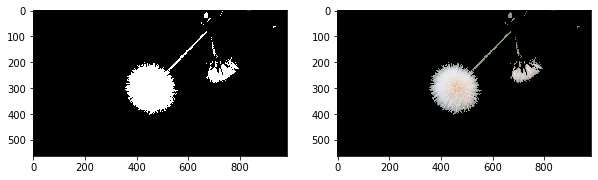

In [20]:
#使用轮廓绘制功能，提取前景对象
#将函数cv2.drawContours()的参数thickness的值设置为-1，可以绘制前景对象的实心轮廓，将实心轮廓与原始图像进行按位与，可以将前景对象抠出来
o = cv2.imread('loc3.jpg')
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros(o.shape,np.uint8)
mask = cv2.drawContours(mask,contours,-1,(255,255,255),-1)

loc = cv2.bitwise_and(o,mask)
plt.figure(figsize=(10,10))
plt.subplot(121),show(mask)
plt.subplot(122),show(loc)

(<matplotlib.axes._subplots.AxesSubplot at 0x19bdfd32198>, None)

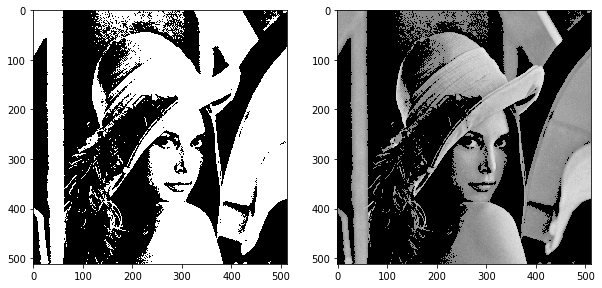

In [3]:
#test
o = cv2.imread('lena.bmp')
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros(o.shape,np.uint8)
mask = cv2.drawContours(mask,contours,-1,(255,255,255),-1)

loc = cv2.bitwise_and(o,mask)
plt.figure(figsize=(10,10))
plt.subplot(121),show(mask)
plt.subplot(122),show(loc)